In [1]:
import pandas as pd
import numpy as np

In [2]:
from plotnine import *

ModuleNotFoundError: No module named 'plotnine'

In [3]:
path = '/Users/Kaemyuijang/SCMA248/Data/us-counties.csv'

#df = pd.read_csv(path, parse_dates=True, index_col = 'date')

df = pd.read_csv(path, parse_dates=['date'], index_col = 'date')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2252245 entries, 2020-01-21 to 2022-02-25
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   county  object 
 1   state   object 
 2   fips    float64
 3   cases   int64  
 4   deaths  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 103.1+ MB


In [5]:
df.index

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2022-02-25', '2022-02-25', '2022-02-25', '2022-02-25',
               '2022-02-25', '2022-02-25', '2022-02-25', '2022-02-25',
               '2022-02-25', '2022-02-25'],
              dtype='datetime64[ns]', name='date', length=2252245, freq=None)

In [47]:
df['lag'] = df.cases.shift(1).fillna(0)
df['daily_cases'] = df.cases - df.lag

In [51]:
df['lag_deaths'] = df.deaths.shift(1).fillna(0)
df['daily_deaths'] = df.deaths - df.lag_deaths

In [57]:
df

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0
2020-01-22,Snohomish,Washington,53061.0,1,0.0
2020-01-23,Snohomish,Washington,53061.0,1,0.0
2020-01-24,Cook,Illinois,17031.0,1,0.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...
2022-02-25,Sweetwater,Wyoming,56037.0,10991,123.0
2022-02-25,Teton,Wyoming,56039.0,9767,16.0
2022-02-25,Uinta,Wyoming,56041.0,5616,36.0


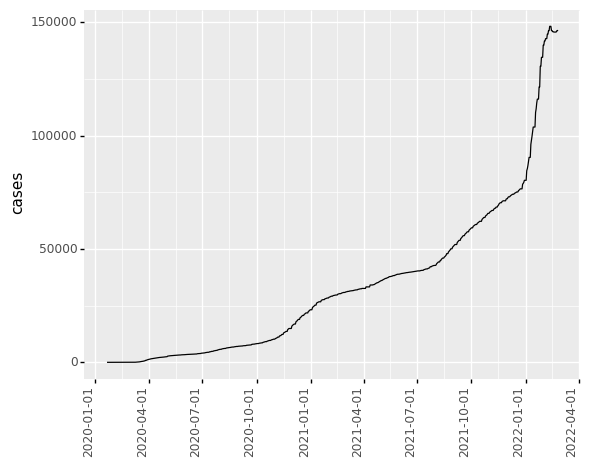

<ggplot: (442449161)>

In [58]:
df_Snohomish = df.query('county == "Snohomish"')


df_Snohomish['lag'] = df_Snohomish.cases.shift(1).fillna(0)
df_Snohomish['daily_cases'] = df_Snohomish.cases - df_Snohomish.lag

(
    ggplot(df_Snohomish) + aes(x = df_Snohomish.index, y = 'cases') + geom_line() +    
    theme(axis_text_x=element_text(rotation=90, hjust=1)) 
)

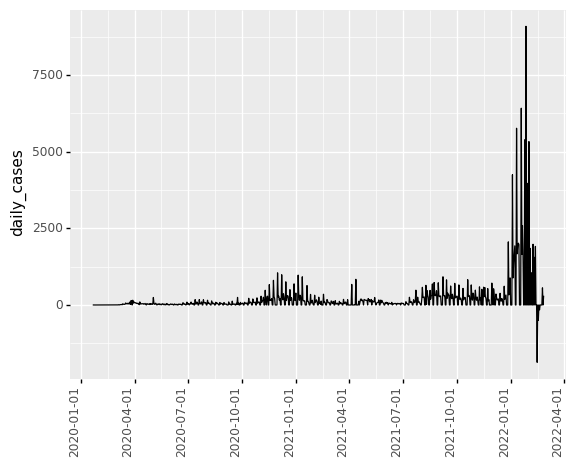

<ggplot: (306320477)>

In [59]:
(
    ggplot(df_Snohomish) + aes(x = df_Snohomish.index, y = 'daily_cases') + geom_line() +    
    theme(axis_text_x=element_text(rotation=90, hjust=1)) 
)

In [81]:
df_Snohomish

,county,state,fips,cases,deaths,lag,daily_cases
date,,,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0,0.0,1.0
2020-01-22,Snohomish,Washington,53061.0,1,0.0,1.0,0.0
2020-01-23,Snohomish,Washington,53061.0,1,0.0,1.0,0.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0,1.0,0.0
2020-01-25,Snohomish,Washington,53061.0,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...
2022-02-21,Snohomish,Washington,53061.0,145694,1034.0,145694.0,0.0
2022-02-22,Snohomish,Washington,53061.0,145694,1034.0,145694.0,0.0
2022-02-23,Snohomish,Washington,53061.0,146253,1046.0,145694.0,559.0


In [69]:
df_Snohomish.daily_cases[df_Snohomish.daily_cases < 0]

date
2020-03-28      -1.0
2020-06-07      -1.0
2022-02-14   -1870.0
2022-02-16    -499.0
2022-02-18    -159.0
Name: daily_cases, dtype: float64

In [72]:
df_Snohomish.loc['2022-02-01':'2022-02-18']

,county,state,fips,cases,deaths,lag,daily_cases
date,,,,,,,
2022-02-01,Snohomish,Washington,53061.0,139881,948.0,139881.0,0.0
2022-02-02,Snohomish,Washington,53061.0,141729,950.0,139881.0,1848.0
2022-02-03,Snohomish,Washington,53061.0,141729,950.0,141729.0,0.0
2022-02-04,Snohomish,Washington,53061.0,142779,957.0,141729.0,1050.0
2022-02-05,Snohomish,Washington,53061.0,142779,957.0,142779.0,0.0
2022-02-06,Snohomish,Washington,53061.0,142779,957.0,142779.0,0.0
2022-02-07,Snohomish,Washington,53061.0,144759,972.0,142779.0,1980.0
2022-02-08,Snohomish,Washington,53061.0,144759,972.0,144759.0,0.0
2022-02-09,Snohomish,Washington,53061.0,146312,983.0,144759.0,1553.0


In [17]:
df.query('state=="Washington"').head(20)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
12,2020-01-26,Snohomish,Washington,53061.0,1,0.0
17,2020-01-27,Snohomish,Washington,53061.0,1,0.0
22,2020-01-28,Snohomish,Washington,53061.0,1,0.0
27,2020-01-29,Snohomish,Washington,53061.0,1,0.0
32,2020-01-30,Snohomish,Washington,53061.0,1,0.0


In [ ]:
df.groupby('county')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2252245 entries, 2020-01-21 to 2022-02-25
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   county  object 
 1   state   object 
 2   fips    float64
 3   cases   int64  
 4   deaths  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 103.1+ MB


In [82]:
path = '/Users/Kaemyuijang/SCMA248/Data/us-counties.csv'

#df = pd.read_csv(path, parse_dates=True, index_col = 'date')

df = pd.read_csv(path, parse_dates=['date'])

In [85]:
df_Snohomish = df.query('county == "Snohomish"')

df_Snohomish['lag'] = df_Snohomish.cases.shift(1).fillna(0)
df_Snohomish['daily_cases'] = df_Snohomish.cases - df_Snohomish.lag

In [88]:
print(df)
df_Snohomish

              date      county       state     fips  cases  deaths
0       2020-01-21   Snohomish  Washington  53061.0      1     0.0
1       2020-01-22   Snohomish  Washington  53061.0      1     0.0
2       2020-01-23   Snohomish  Washington  53061.0      1     0.0
3       2020-01-24        Cook    Illinois  17031.0      1     0.0
4       2020-01-24   Snohomish  Washington  53061.0      1     0.0
...            ...         ...         ...      ...    ...     ...
2252240 2022-02-25  Sweetwater     Wyoming  56037.0  10991   123.0
2252241 2022-02-25       Teton     Wyoming  56039.0   9767    16.0
2252242 2022-02-25       Uinta     Wyoming  56041.0   5616    36.0
2252243 2022-02-25    Washakie     Wyoming  56043.0   2336    43.0
2252244 2022-02-25      Weston     Wyoming  56045.0   1541    18.0

[2252245 rows x 6 columns]


,date,county,state,fips,cases,deaths,lag,daily_cases
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,0.0,1.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,1.0,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,1.0,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,1.0,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2239078,2022-02-21,Snohomish,Washington,53061.0,145694,1034.0,145694.0,0.0
2242330,2022-02-22,Snohomish,Washington,53061.0,145694,1034.0,145694.0,0.0
2245582,2022-02-23,Snohomish,Washington,53061.0,146253,1046.0,145694.0,559.0
2248834,2022-02-24,Snohomish,Washington,53061.0,146253,1046.0,146253.0,0.0


In [90]:
pd_merge = pd.merge(df,df_Snohomish, how = 'left', on = ['date','county'])

In [95]:
pd_merge.query('county == "Snohomish"')

,date,county,state_x,fips_x,cases_x,deaths_x,state_y,fips_y,cases_y,deaths_y,lag,daily_cases
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,Washington,53061.0,1.0,0.0,0.0,1.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,Washington,53061.0,1.0,0.0,1.0,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,Washington,53061.0,1.0,0.0,1.0,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,Washington,53061.0,1.0,0.0,1.0,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0,Washington,53061.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2239078,2022-02-21,Snohomish,Washington,53061.0,145694,1034.0,Washington,53061.0,145694.0,1034.0,145694.0,0.0
2242330,2022-02-22,Snohomish,Washington,53061.0,145694,1034.0,Washington,53061.0,145694.0,1034.0,145694.0,0.0
2245582,2022-02-23,Snohomish,Washington,53061.0,146253,1046.0,Washington,53061.0,146253.0,1046.0,145694.0,559.0
2248834,2022-02-24,Snohomish,Washington,53061.0,146253,1046.0,Washington,53061.0,146253.0,1046.0,146253.0,0.0


In [111]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [112]:
df = pd.read_csv(path, parse_dates=['date'], index_col = 'date')

df = df.query('county in ["Snohomish","Cook"]')
#df = df.query('county in ["Snohomish"]')

In [39]:
df.loc['2022-02-01':'2022-02-18']

,county,state,fips,cases,deaths
date,,,,,
2022-02-01,Cook,Georgia,13075.0,4744,66.0
2022-02-01,Cook,Illinois,17031.0,1082395,13970.0
2022-02-01,Cook,Minnesota,27031.0,507,2.0
2022-02-01,Snohomish,Washington,53061.0,139881,948.0
2022-02-02,Cook,Georgia,13075.0,4764,66.0
...,...,...,...,...,...
2022-02-17,Snohomish,Washington,53061.0,145853,1018.0
2022-02-18,Cook,Georgia,13075.0,4855,68.0
2022-02-18,Cook,Illinois,17031.0,1105263,14439.0


In [57]:
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

pd.options.mode.chained_assignment = None


53061.0
               county       state     fips   cases  deaths  daily_cases
date                                                                   
2020-01-21  Snohomish  Washington  53061.0       1     0.0          1.0
2020-01-22  Snohomish  Washington  53061.0       1     0.0          0.0
2020-01-23  Snohomish  Washington  53061.0       1     0.0          0.0
2020-01-24  Snohomish  Washington  53061.0       1     0.0          0.0
2020-01-25  Snohomish  Washington  53061.0       1     0.0          0.0
...               ...         ...      ...     ...     ...          ...
2022-02-21  Snohomish  Washington  53061.0  145694  1034.0          0.0
2022-02-22  Snohomish  Washington  53061.0  145694  1034.0          0.0
2022-02-23  Snohomish  Washington  53061.0  146253  1046.0        559.0
2022-02-24  Snohomish  Washington  53061.0  146253  1046.0          0.0
2022-02-25  Snohomish  Washington  53061.0  146553  1054.0        300.0

[767 rows x 6 columns]
17031.0
           county     st

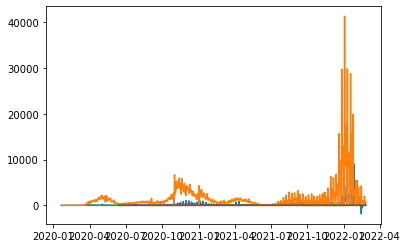

In [58]:
df_new = pd.DataFrame()

for id in df['fips'].unique():
    print(id)
    temp = df.query('fips == @id')
    temp['lag'] = temp.cases.shift(1).fillna(0)
    temp['daily_cases'] = temp.cases - temp.lag
    temp.drop(columns=['lag'], inplace = True)
    print(temp)
    
    plt.plot(temp.index,temp.daily_cases)
    #print(temp.query('county == @ct'))
    #df_new = pd.concat([df_new,temp])
    
    #print(temp)
    #df = pd.merge(df,temp, how = 'left', on =  ['date','county','state','fips','cases','deaths'])
    #df.drop(columns=['lag'], inplace = True)
    #print(df.columns)

53061.0
17031.0
13075.0
27031.0


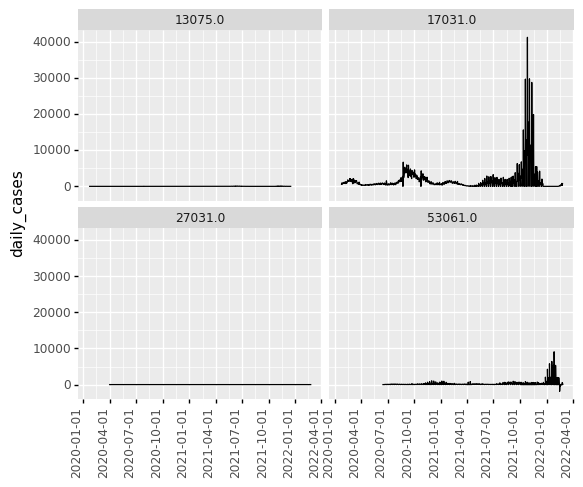

<ggplot: (313508713)>

In [105]:
df_new = pd.DataFrame()

for id in df['fips'].unique():
    print(id)
    temp = df.query('fips == @id')
    temp['lag'] = temp.cases.shift(1).fillna(0)
    temp['daily_cases'] = temp.cases - temp.lag
    temp.drop(columns=['lag'], inplace = True)
    
    rolling = temp.daily_cases.rolling(7, center=True)
    #print(rolling.mean().shape)
    #print(temp.shape)
    
    temp['rolling_mean'] = rolling.mean()
    #print(temp)
    
    df_new = pd.concat([df_new,temp])
    
    #print(temp)
    #df = pd.merge(df,temp, how = 'left', on =  ['date','county','state','fips','cases','deaths'])
    #df.drop(columns=['lag'], inplace = True)
    #print(df.columns)

(
    ggplot(df_new) + aes(x = df_new.index, y = 'daily_cases') + geom_line() +    
    theme(axis_text_x=element_text(rotation=90, hjust=1)) + 
    facet_wrap('fips')
)

In [106]:
df_new.loc[df_new['fips'] == 13075.]['2022-02-01':'2022-02-18']

,county,state,fips,cases,deaths,daily_cases,rolling_mean
date,,,,,,,
2022-02-01,Cook,Georgia,13075.0,4744,66.0,25.0,16.428571
2022-02-02,Cook,Georgia,13075.0,4764,66.0,20.0,16.428571
2022-02-03,Cook,Georgia,13075.0,4778,66.0,14.0,16.428571
2022-02-04,Cook,Georgia,13075.0,4787,66.0,9.0,13.285714
2022-02-05,Cook,Georgia,13075.0,4787,66.0,0.0,11.285714
2022-02-06,Cook,Georgia,13075.0,4787,66.0,0.0,9.142857
2022-02-07,Cook,Georgia,13075.0,4812,67.0,25.0,8.428571
2022-02-08,Cook,Georgia,13075.0,4823,67.0,11.0,8.142857
2022-02-09,Cook,Georgia,13075.0,4828,67.0,5.0,8.142857


           county    state     fips  cases  deaths  daily_cases  rolling_mean
date                                                                         
2020-03-30   Cook  Georgia  13075.0      1     0.0          1.0           NaN
2020-03-31   Cook  Georgia  13075.0      1     0.0          0.0           NaN
2020-04-01   Cook  Georgia  13075.0      1     0.0          0.0           NaN
2020-04-02   Cook  Georgia  13075.0      1     0.0          0.0      0.142857
2020-04-03   Cook  Georgia  13075.0      1     0.0          0.0      0.142857
2020-04-04   Cook  Georgia  13075.0      1     0.0          0.0      0.428571
2020-04-05   Cook  Georgia  13075.0      1     0.0          0.0      0.428571
2020-04-06   Cook  Georgia  13075.0      2     0.0          1.0      0.714286
2020-04-07   Cook  Georgia  13075.0      4     0.0          2.0      0.714286
2020-04-08   Cook  Georgia  13075.0      4     0.0          0.0      0.714286


/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 6 rows containing missing values.


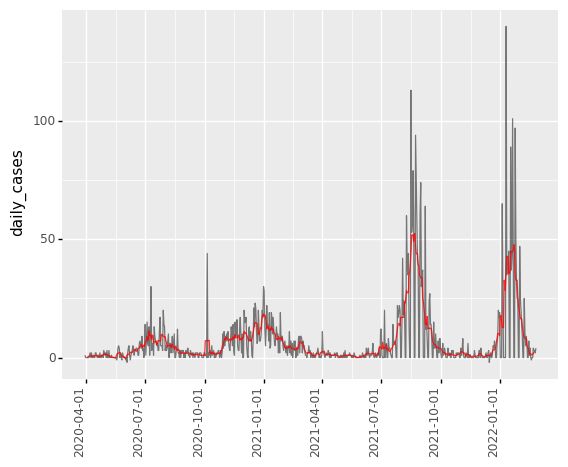

<ggplot: (313296677)>

In [110]:
#df_new13075 = df_new.loc[df_new['fips'] == 13075.]['2021-07-01':'2022-02-18']

df_new13075 = df_new.query('fips == 13075.')

print(df_new13075.head(10))
(
    ggplot(df_new13075.query('fips == 13075.')) +
    geom_line(aes(x = df_new13075.index, y = 'daily_cases'), alpha = 0.5) +
    geom_line(aes(x = df_new13075.index, y = 'rolling_mean'), color='red',alpha=0.8) +
        theme(axis_text_x=element_text(rotation=90, hjust=1)) 
)

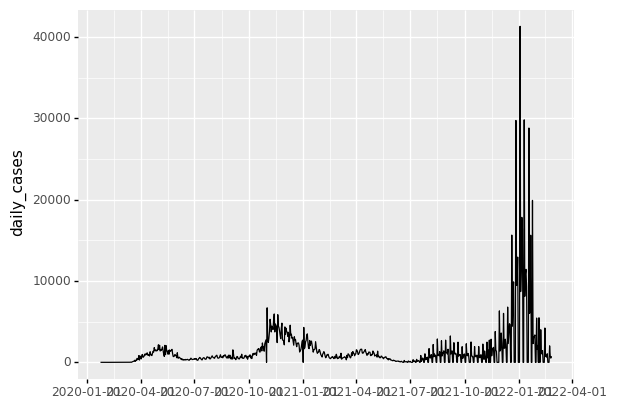

<ggplot: (384735453)>

In [283]:
df_new17031 = df_new.query('fips == 17031.')

ggplot(df_new17031.query('fips == 17031.')) + aes(x = df_new17031.index, y = 'daily_cases') + geom_line()

In [117]:
df = pd.read_csv(path, parse_dates=['date'], index_col = 'date')

df = df.query('state in ["Washington"]')
#df = df.query('county in ["Snohomish"]')

print(df.county.unique())

['Snohomish' 'Spokane' 'King' 'Walla Walla' 'Chelan' 'Clark' 'Jefferson'
 'Pierce' 'Kittitas' 'Kitsap' 'Skagit' 'Whatcom' 'Island' 'Thurston'
 'Columbia' 'Grays Harbor' 'Yakima' 'Grant' 'Klickitat' 'Lewis' 'Lincoln'
 'Franklin' 'Mason' 'Benton' 'Clallam' 'Cowlitz' 'San Juan' 'Stevens'
 'Whitman' 'Adams' 'Douglas' 'Unknown' 'Ferry' 'Okanogan' 'Skamania'
 'Pend Oreille' 'Asotin' 'Wahkiakum' 'Pacific' 'Garfield']


53061.0
53063.0
53033.0
53071.0
53007.0
53011.0
53031.0
53053.0
53037.0
53035.0
53057.0
53073.0
53029.0
53067.0
53013.0
53027.0
53077.0
53025.0
53039.0
53041.0
53043.0
53021.0
53045.0
53005.0
53009.0
53015.0
53055.0
53065.0
53075.0
53001.0
53017.0
nan
53019.0
53047.0
53059.0
53051.0
53003.0
53069.0
53049.0
53023.0


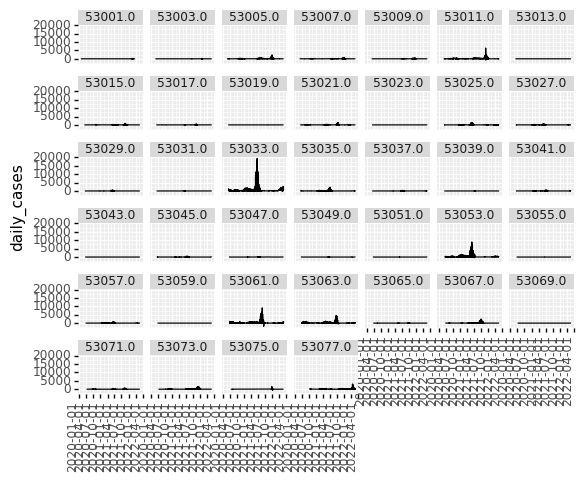

<ggplot: (313502521)>

In [118]:
df_new = pd.DataFrame()

for id in df['fips'].unique():
    print(id)
    temp = df.query('fips == @id')
    temp['lag'] = temp.cases.shift(1).fillna(0)
    temp['daily_cases'] = temp.cases - temp.lag
    temp.drop(columns=['lag'], inplace = True)
    
    rolling = temp.daily_cases.rolling(7, center=True)
    #print(rolling.mean().shape)
    #print(temp.shape)
    
    temp['rolling_mean'] = rolling.mean()
    #print(temp)
    
    df_new = pd.concat([df_new,temp])
    
    #print(temp)
    #df = pd.merge(df,temp, how = 'left', on =  ['date','county','state','fips','cases','deaths'])
    #df.drop(columns=['lag'], inplace = True)
    #print(df.columns)

(
    ggplot(df_new) + aes(x = df_new.index, y = 'daily_cases') + geom_line() +    
    theme(axis_text_x=element_text(rotation=90, hjust=1)) + 
    facet_wrap('fips')
)

/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 6 rows containing missing values.


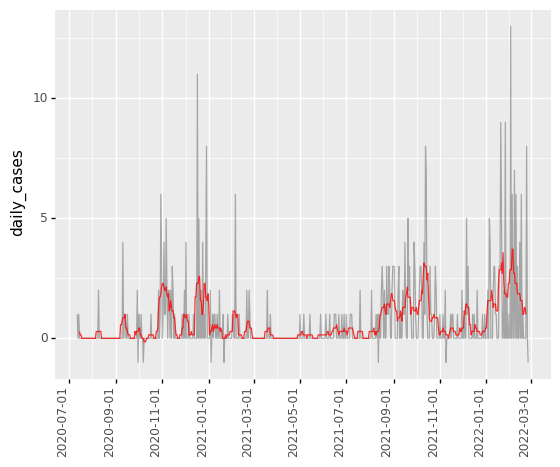

<ggplot: (314210065)>

In [126]:
fips_id = 53023.0

df_subset = df_new.query('fips==@fips_id')

(
    ggplot(df_subset) + geom_line(aes(x = df_subset.index, y = 'daily_cases'), alpha = 0.3) +    
    geom_line(aes(x = df_subset.index, y = 'rolling_mean'),color='red', alpha = 0.8) +    
    theme(axis_text_x=element_text(rotation=90, hjust=1)) 
)

Snohomish
               county       state     fips   cases  deaths  daily_cases
date                                                                   
2020-01-21  Snohomish  Washington  53061.0       1     0.0          1.0
2020-01-22  Snohomish  Washington  53061.0       1     0.0          0.0
2020-01-23  Snohomish  Washington  53061.0       1     0.0          0.0
2020-01-24  Snohomish  Washington  53061.0       1     0.0          0.0
2020-01-25  Snohomish  Washington  53061.0       1     0.0          0.0
...               ...         ...      ...     ...     ...          ...
2022-02-21  Snohomish  Washington  53061.0  145694  1034.0          0.0
2022-02-22  Snohomish  Washington  53061.0  145694  1034.0          0.0
2022-02-23  Snohomish  Washington  53061.0  146253  1046.0        559.0
2022-02-24  Snohomish  Washington  53061.0  146253  1046.0          0.0
2022-02-25  Snohomish  Washington  53061.0  146553  1054.0        300.0

[767 rows x 6 columns]


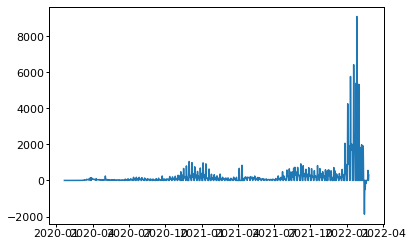

In [260]:
df_new = pd.DataFrame()

for ct in df['county'].unique():
    print(ct)
    temp = df.query('county == @ct')
    temp['lag'] = temp.cases.shift(1).fillna(0)
    temp['daily_cases'] = temp.cases - temp.lag
    temp.drop(columns=['lag'], inplace = True)
    print(temp)
    
    plt.plot(temp.index,temp.daily_cases)
    #print(temp.query('county == @ct'))
    #df_new = pd.concat([df_new,temp])
    
    #print(temp)
    #df = pd.merge(df,temp, how = 'left', on =  ['date','county','state','fips','cases','deaths'])
    #df.drop(columns=['lag'], inplace = True)
    #print(df.columns)
  

           county      state     fips    cases   deaths  daily_cases
date                                                                
2020-01-24   Cook   Illinois  17031.0        1      0.0          1.0
2020-01-25   Cook   Illinois  17031.0        1      0.0          0.0
2020-01-26   Cook   Illinois  17031.0        1      0.0          0.0
2020-01-27   Cook   Illinois  17031.0        1      0.0          0.0
2020-01-28   Cook   Illinois  17031.0        1      0.0          0.0
...           ...        ...      ...      ...      ...          ...
2022-02-24   Cook   Illinois  17031.0  1108582  14552.0    1103715.0
2022-02-24   Cook  Minnesota  27031.0      538      4.0   -1108044.0
2022-02-25   Cook    Georgia  13075.0     4871     69.0       4333.0
2022-02-25   Cook   Illinois  17031.0  1109348  14571.0    1104477.0
2022-02-25   Cook  Minnesota  27031.0      539      4.0   -1108809.0

[2085 rows x 6 columns]


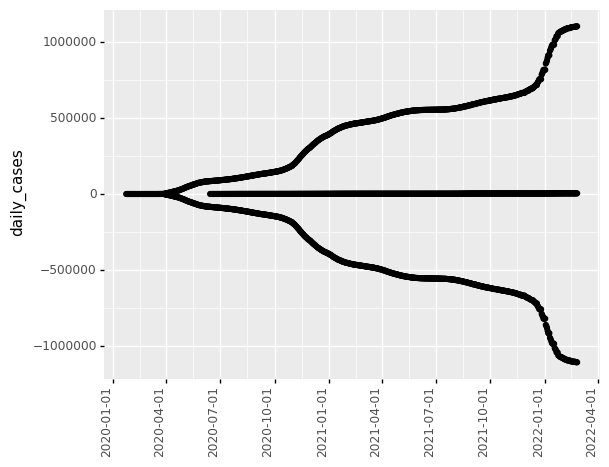

<ggplot: (307051573)>

In [241]:
test = df_new[df_new['county']=="Cook"]

print(test)

(
    ggplot(test) + aes(x = test.index, y = 'daily_cases') + geom_point() +    
    theme(axis_text_x=element_text(rotation=90, hjust=1)) 
)

In [190]:
df

,county,state,fips,cases,deaths,daily_cases_x,daily_cases_y
date,,,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0,NaN,NaN
2020-01-22,Snohomish,Washington,53061.0,1,0.0,NaN,NaN
2020-01-23,Snohomish,Washington,53061.0,1,0.0,NaN,NaN
2020-01-24,Cook,Illinois,17031.0,1,0.0,1.0,1.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2022-02-24,Snohomish,Washington,53061.0,146253,1046.0,NaN,NaN
2022-02-25,Cook,Georgia,13075.0,4871,69.0,4333.0,4333.0
2022-02-25,Cook,Illinois,17031.0,1109348,14571.0,1104477.0,1104477.0


In [120]:
pd_merge

,date,county,state_x,fips_x,cases_x,deaths_x,state_y,fips_y,cases_y,deaths_y,lag,daily_cases
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,Illinois,17031.0,1.0,0.0,0.0,1.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6735,2022-02-25,Cook,Illinois,17031.0,1109348,14571.0,Minnesota,27031.0,539.0,4.0,1109348.0,-1108809.0
6736,2022-02-25,Cook,Minnesota,27031.0,539,4.0,Georgia,13075.0,4871.0,69.0,538.0,4333.0
6737,2022-02-25,Cook,Minnesota,27031.0,539,4.0,Illinois,17031.0,1109348.0,14571.0,4871.0,1104477.0
6738,2022-02-25,Cook,Minnesota,27031.0,539,4.0,Minnesota,27031.0,539.0,4.0,1109348.0,-1108809.0


In [117]:
df.query('county == @name')

,date,county,state,fips,cases,deaths
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
11,2020-01-26,Cook,Illinois,17031.0,1,0.0
16,2020-01-27,Cook,Illinois,17031.0,1,0.0
21,2020-01-28,Cook,Illinois,17031.0,1,0.0
...,...,...,...,...,...,...
2246358,2022-02-24,Cook,Illinois,17031.0,1108582,14552.0
2247084,2022-02-24,Cook,Minnesota,27031.0,538,4.0
2249420,2022-02-25,Cook,Georgia,13075.0,4871,69.0
2249610,2022-02-25,Cook,Illinois,17031.0,1109348,14571.0


In [174]:
df_merged = df

ct = "Cook"
#print(ct)
temp = df_merged.query('county == @name')
#print(temp)
temp['lag'] = temp.cases.shift(1).fillna(0)
temp['daily_cases'] = temp.cases - temp.lag
#print(temp[['county','daily_cases']])
#print(temp['county','daily_cases'])
df_merged = pd.merge(df_merged,temp, how = 'left', on = ['date','county','state','fips','cases','deaths'])
print(df_merged)

               county       state     fips    cases   deaths        lag  \
date                                                                      
2020-01-21  Snohomish  Washington  53061.0        1      0.0        NaN   
2020-01-22  Snohomish  Washington  53061.0        1      0.0        NaN   
2020-01-23  Snohomish  Washington  53061.0        1      0.0        NaN   
2020-01-24       Cook    Illinois  17031.0        1      0.0        0.0   
2020-01-24  Snohomish  Washington  53061.0        1      0.0        NaN   
...               ...         ...      ...      ...      ...        ...   
2022-02-24  Snohomish  Washington  53061.0   146253   1046.0        NaN   
2022-02-25       Cook     Georgia  13075.0     4871     69.0      538.0   
2022-02-25       Cook    Illinois  17031.0  1109348  14571.0     4871.0   
2022-02-25       Cook   Minnesota  27031.0      539      4.0  1109348.0   
2022-02-25  Snohomish  Washington  53061.0   146553   1054.0        NaN   

            daily_cases 

In [162]:
temp.head()

,county,state,fips,cases,deaths,lag,daily_cases
date,,,,,,,
2020-01-24,Cook,Illinois,17031.0,1,0.0,0.0,1.0
2020-01-25,Cook,Illinois,17031.0,1,0.0,1.0,0.0
2020-01-26,Cook,Illinois,17031.0,1,0.0,1.0,0.0
2020-01-27,Cook,Illinois,17031.0,1,0.0,1.0,0.0
2020-01-28,Cook,Illinois,17031.0,1,0.0,1.0,0.0


In [151]:
pd.merge(df_merged,temp, how = 'left', on = ['date','county','state','fips','cases','deaths'])

,county,state,fips,cases,deaths,lag,daily_cases
date,,,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0,NaN,NaN
2020-01-22,Snohomish,Washington,53061.0,1,0.0,NaN,NaN
2020-01-23,Snohomish,Washington,53061.0,1,0.0,NaN,NaN
2020-01-24,Cook,Illinois,17031.0,1,0.0,0.0,1.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2022-02-24,Snohomish,Washington,53061.0,146253,1046.0,NaN,NaN
2022-02-25,Cook,Georgia,13075.0,4871,69.0,538.0,4333.0
2022-02-25,Cook,Illinois,17031.0,1109348,14571.0,4871.0,1104477.0
